## Q2. Perform the following preprocessing tasks on the dirty_iris dataset.<br>
**i) Calculate the number and percentage of observations that are complete.<br>
ii) Replace all the special values in data with NA.<br>
iii) Define these rules in a separate text file and read them.<br>
(Use editfile function in R (package editrules). Use similar function in Python).
Print the resulting constraint object.<br>
    Species should be one of the following values: setosa, versicolor or virginica.<br>
    All measured numerical properties of an iris should be positive.<br>
    The petal length of an iris is at least 2 times its petal width.<br>
    The sepal length of an iris cannot exceed 30 cm.<br>
    The sepals of an iris are longer than its petals.<br>
iv) Determine how often each rule is broken (violatedEdits). Also summarize and plot the
result.<br>
v) Find outliers in sepal length using boxplot and boxplot.stats<br>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("iris_dirty.csv")

# Calculate the number and percentage of observations that are complete.

In [3]:
complete_obs=df.shape[0]-df.isnull().sum().sum()
complete_obs

131

In [4]:
complete_obs/df.shape[0]*100

87.33333333333333

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  142 non-null    float64
 1   Sepal.Width   139 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Replace all the special values in data with NA.

In [7]:
df=df.replace([np.inf],np.NaN)

In [8]:
df.isnull().sum()

Sepal.Length     8
Sepal.Width     11
Petal.Length     0
Petal.Width      0
Species          0
dtype: int64

# Define these rules in a separate text file and read them.

- **Species should be one of the following values: setosa, versicolor or virginica.**
- **All measured numerical properties of an iris should be positive.**
- **The petal length of an iris is at least 2 times its petal width.**
- **The sepal length of an iris cannot exceed 30 cm.**
- **The sepals of an iris are longer than its petals.**

In [9]:
df3=df.fillna(0)

In [10]:
def ruleset(df):
    rule1=[]
    rule2=[]
    rule3=[]
    rule4=[]
    rule5=[]
    for i in range(df.shape[0]):
        sepal_len=df.iloc[i][0]
        sepal_wid=df.iloc[i][1]
        petal_len=df.iloc[i][2]
        petal_wid=df.iloc[i][3]
        spec=df.iloc[i][4]
        
        if(spec not in ['setosa','versicolor','virginica']): rule1.append(i)
        if(sepal_len <=0 or sepal_wid <=0 or petal_len <=0 or petal_wid <=0 ): rule2.append(i)
        if(petal_len < 2*petal_wid): rule3.append(i)
        if(sepal_len > 30): rule4.append(i)
        if(petal_len >= sepal_len or petal_wid >= sepal_wid): rule5.append(i)
        
        
    return rule1,rule2,rule3,rule4,rule5

In [11]:
r1,r2,r3,r4,r5=ruleset(df3)

In [12]:
df_freq=pd.Series({'r1':len(r1),
        'r2':len(r2),
         'r3':len(r3),
         'r4':len(r4),
         'r5':len(r5)
        })
df_freq

r1     5
r2    19
r3     0
r4     0
r5    19
dtype: int64

# Determine how often each rule is broken (violatedEdits). Also summarize and plot the result.

In [13]:
df_freq

r1     5
r2    19
r3     0
r4     0
r5    19
dtype: int64

<Axes: >

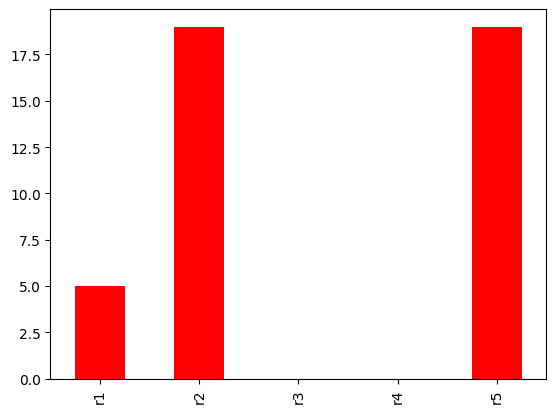

In [15]:
df_freq.plot.bar(color='red')

#  Find outliers in sepal length using boxplot and boxplot.stats

<Axes: xlabel='Sepal.Length'>

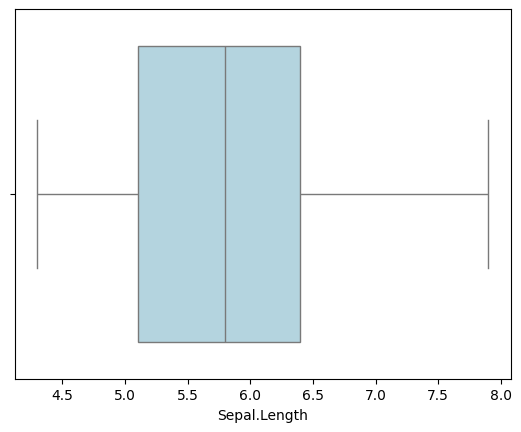

In [17]:
sns.boxplot(x=df["Sepal.Length"],color='lightblue')

In [18]:
Q1 = df['Sepal.Length'].quantile(0.25)
print("Q1 : ",Q1)
Q3 = df['Sepal.Length'].quantile(0.75)
print("Q3 : ",Q3)
IQR = Q3 - Q1
print("IQR : ",IQR)
lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR
print("lower_bound : ",lower_bound)
print("upper_bound : ",upper_bound)

Q1 :  5.1
Q3 :  6.4
IQR :  1.3000000000000007
lower_bound :  3.1499999999999986
upper_bound :  8.350000000000001
